# Plotting Visualisations

## Getting the essential libraries
#### Loading and cleaning the features.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

CSV_PATH = r'/Users/vanshikasharma/Desktop/Advanced ML/congestion_with_labels.csv'
OUTPUT_DIR = Path("congestion_outputs")
OUTPUT_DIR.mkdir(exist_ok=True)


df = pd.read_csv(CSV_PATH)


# Parse datetime if needed
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Ensure numeric values
df['Avg_Volume'] = pd.to_numeric(df['Avg_Volume'], errors='coerce').fillna(0)

# Order days properly
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)


## HeatMap 
### (To visualise traffic patterns based on temporal features, like day of the week and the hour of the day)

/var/folders/ls/fn7rwzbx01x5tkf__bhm1sgm0000gn/T/ipykernel_1230/1783556817.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['DayOfWeek','Hour'])['Avg_Volume']


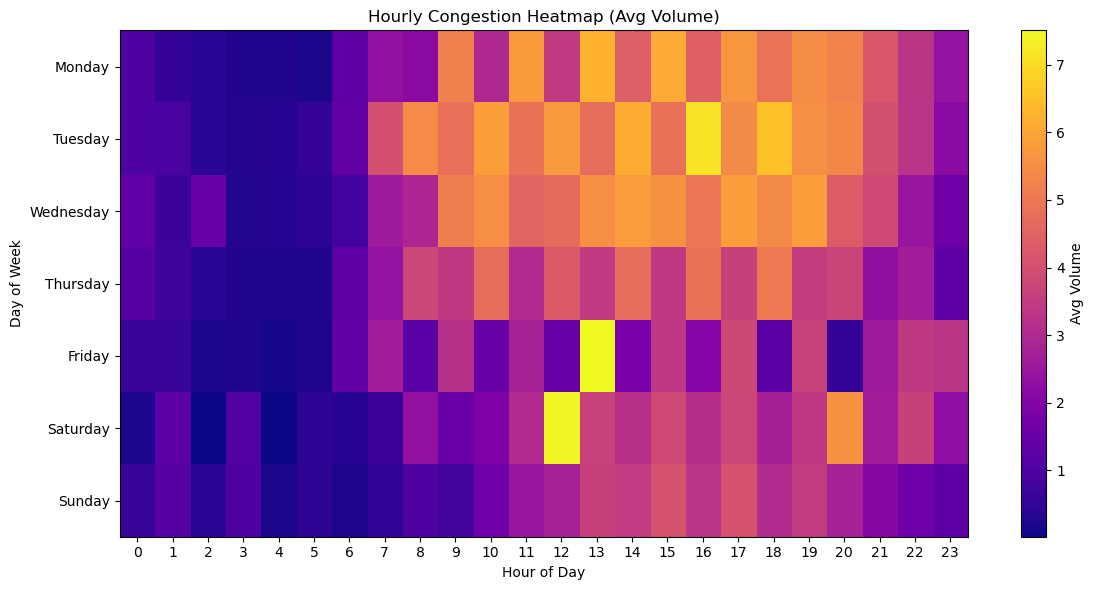

In [9]:
heat = (
    df.groupby(['DayOfWeek','Hour'])['Avg_Volume']
      .mean()
      .unstack(fill_value=0)
      .reindex(day_order)
)

plt.figure(figsize=(12,6))
plt.imshow(heat, aspect='auto', cmap='plasma')
plt.title("Hourly Congestion Heatmap (Avg Volume)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(len(day_order)), day_order)
cbar = plt.colorbar()
cbar.set_label("Avg Volume")
plt.tight_layout()
plt.show()

### Scatter Plot to visualise the data points in NCITY and SCITY of Dublin

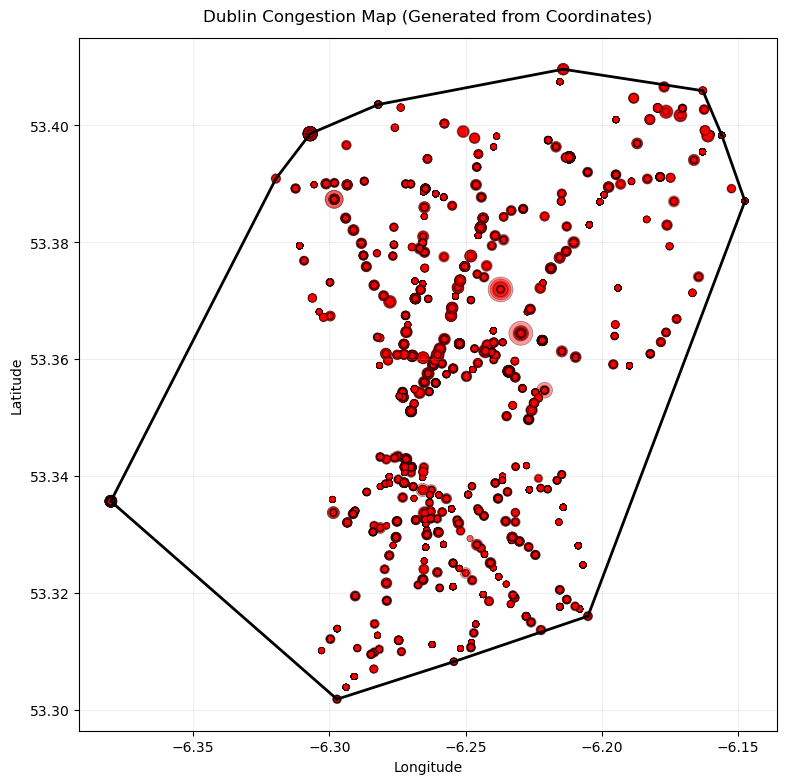

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull


df = df.dropna(subset=['Latitude','Longitude'])
df['Avg_Volume'] = pd.to_numeric(df['Avg_Volume'], errors='coerce').fillna(0)
coords = df[['Longitude', 'Latitude']].values
hull = ConvexHull(coords)
plt.figure(figsize=(9,9))

for simplex in hull.simplices:
    plt.plot(coords[simplex, 0], coords[simplex, 1], 'k-', linewidth=2)

sizes = (df['Avg_Volume'] / df['Avg_Volume'].max()) * 300 + 20
plt.scatter(df['Longitude'], df['Latitude'],
            s=sizes, c='red', alpha=0.4, edgecolors='black', linewidths=0.5)
plt.title("Dublin Congestion Map (Generated from Coordinates)", pad=12)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.2)
plt.show()

## Scatter Plot (using Image)
### Visualising the plot ad identifying regions with more traffic levels

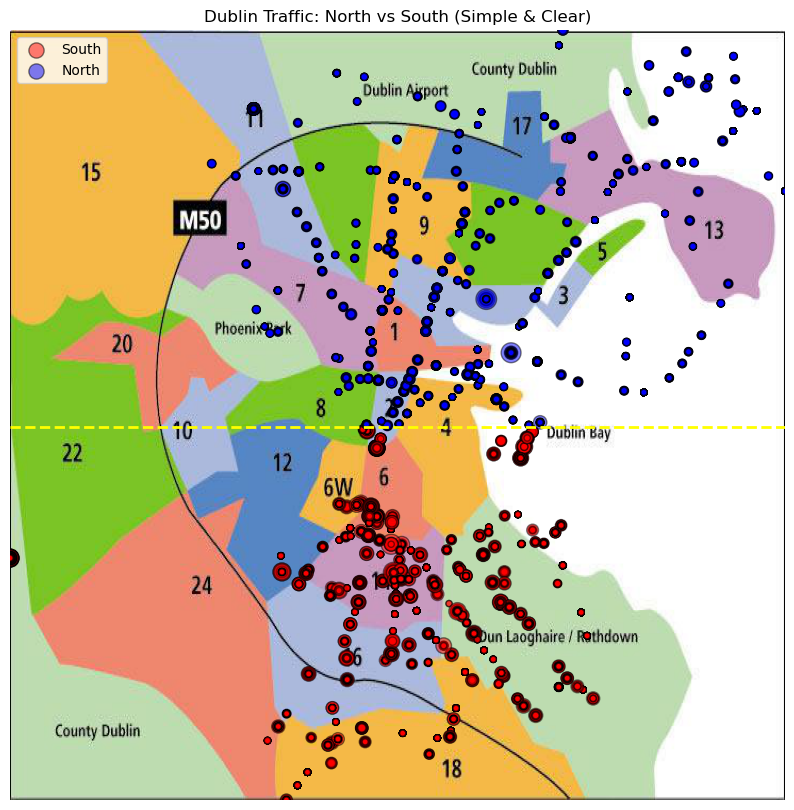

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

df = df.dropna(subset=['Latitude','Longitude'])
df['Avg_Volume'] = pd.to_numeric(df['Avg_Volume'], errors='coerce').fillna(0)
map_img = Image.open("/Users/vanshikasharma/Downloads/dublin-map-areas.jpg")

LIFFEY_LAT = 53.354

df['Zone'] = np.where(df['Latitude'] >= LIFFEY_LAT, 'North', 'South')
lon_min, lon_max = df['Longitude'].min(), df['Longitude'].max()
lat_min, lat_max = df['Latitude'].min(), df['Latitude'].max()

north = df[df['Zone']=="North"]
south = df[df['Zone']=="South"]

plt.figure(figsize=(10,10))
plt.imshow(map_img, extent=[lon_min, lon_max, lat_min, lat_max], aspect='auto')

# South = **red**, North = **blue**, keep it clean
plt.scatter(south['Longitude'], south['Latitude'],
            s=(south['Avg_Volume']/south['Avg_Volume'].max())*200+20,
            color='red', alpha=0.5, edgecolors='black', label="South")

plt.scatter(north['Longitude'], north['Latitude'],
            s=(north['Avg_Volume']/north['Avg_Volume'].max())*200+20,
            color='blue', alpha=0.5, edgecolors='black', label="North")

plt.hlines(LIFFEY_LAT, lon_min, lon_max, colors='yellow', linestyles='--', linewidth=2)

plt.title("Dublin Traffic: North vs South (Simple & Clear)")
plt.axis('off')
plt.legend()
plt.show()

## Line Plot
### (To visualise the traffic flow in weekends and weekdays)

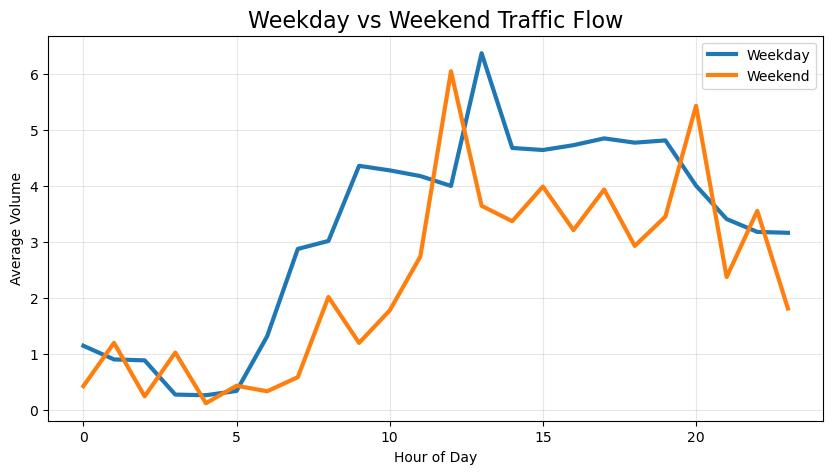

In [25]:
df['DayOfWeek'] = pd.to_datetime(df['End_Time']).dt.day_name()
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday','Sunday'])

wk = df.groupby(['Hour','IsWeekend'])['Avg_Volume'].mean().reset_index()

plt.figure(figsize=(10,5))
for w, label in [(False,'Weekday'), (True,'Weekend')]:
    plt.plot(wk[wk.IsWeekend==w]['Hour'],
             wk[wk.IsWeekend==w]['Avg_Volume'],
             linewidth=3, label=label)

plt.title("Weekday vs Weekend Traffic Flow", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Average Volume")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# All the other plots are in the main files with model creations and EDA part as well.
### These plots are created by Vanshika Sharma . 